In [148]:
import pandas as pd
import numpy as np
data =pd.read_csv('aug_train_preprocessed.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,3,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,3,0,5,6,4,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,6,82,0
3,19067,14,52,3,1,2,0,1,20,8,5,6,51,1
4,358,50,45,1,0,3,2,5,21,4,1,3,7,0


In [149]:
data.shape

(19158, 14)

In [150]:
df=pd.DataFrame(data)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,3,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,3,0,5,6,4,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,6,82,0
3,19067,14,52,3,1,2,0,1,20,8,5,6,51,1
4,358,50,45,1,0,3,2,5,21,4,1,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,4117,55,71,1,1,3,0,2,5,8,6,0,41,1
19154,17981,5,85,1,0,3,0,5,5,8,6,3,51,1
19155,14021,5,85,1,0,3,0,5,21,4,5,3,43,0
19156,3185,94,56,1,0,3,1,6,20,5,5,1,95,0


In [151]:
x=data.drop(columns='target')
x

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5018,5,85,1,0,3,0,5,21,8,6,0,35
1,16986,77,48,1,1,3,0,5,6,4,5,4,46
2,6499,64,14,3,1,0,0,5,15,8,6,6,82
3,19067,14,52,3,1,2,0,1,20,8,5,6,51
4,358,50,45,1,0,3,2,5,21,4,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,4117,55,71,1,1,3,0,2,5,8,6,0,41
19154,17981,5,85,1,0,3,0,5,5,8,6,3,51
19155,14021,5,85,1,0,3,0,5,21,4,5,3,43
19156,3185,94,56,1,0,3,1,6,20,5,5,1,95


In [152]:
y=data['target']
y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int64

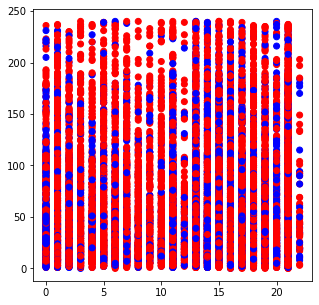

In [153]:
import matplotlib.pyplot as plt
import matplotlib.pyplot 
colors = ['red','blue']
fig = plt.figure(figsize=(5,5))
plt.scatter(x.experience, x.training_hours, c=y, cmap=matplotlib.colors.ListedColormap(colors))

<AxesSubplot:xlabel='experience', ylabel='training_hours'>

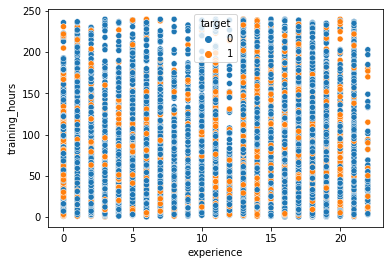

In [154]:
sns.scatterplot(x=data['experience'], y=data['training_hours'], hue=data['target'])

<AxesSubplot:xlabel='experience', ylabel='company_size'>

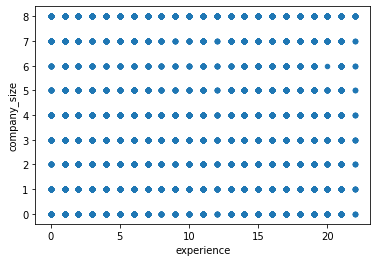

In [155]:
x.plot(kind="scatter", x="experience", y="company_size")

In [156]:
# Normalization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

array([[-0.8246182 , -1.10520322,  0.75589002, ...,  0.79735656,
        -0.90426948, -0.51266315],
       [ 1.33940561,  0.9250771 , -0.5100811 , ...,  0.12727905,
         0.91825376, -0.30004804],
       [-0.55682748,  0.55849871, -1.67340591, ...,  0.79735656,
         1.82951538,  0.39578325],
       ...,
       [ 0.80328173, -1.10520322,  0.75589002, ...,  0.12727905,
         0.46262295, -0.35803398],
       [-1.15605667,  1.40444885, -0.23635762, ...,  0.12727905,
        -0.44863867,  0.64705566],
       [ 0.72119059,  1.43264719,  0.14001218, ...,  0.79735656,
        -0.90426948,  1.20758643]])

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [158]:
import math
n=int(math.sqrt(x_train.shape[0]))
n

123

In [172]:
neighbors = np.arange(38,49)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    print("Accuracy of K=",k,"is",test_accuracy[i])

Accuracy of K= 38 is 0.7724425887265136
Accuracy of K= 39 is 0.7687891440501043
Accuracy of K= 40 is 0.7721816283924844
Accuracy of K= 41 is 0.769572025052192
Accuracy of K= 42 is 0.7706158663883089
Accuracy of K= 43 is 0.7724425887265136
Accuracy of K= 44 is 0.7713987473903967
Accuracy of K= 45 is 0.7729645093945721
Accuracy of K= 46 is 0.7711377870563675
Accuracy of K= 47 is 0.7698329853862212
Accuracy of K= 48 is 0.7690501043841336


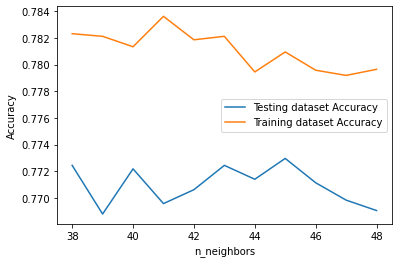

In [173]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [174]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
clf= KNeighborsClassifier(n_neighbors=45, metric='euclidean', p=2 )  
clf.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [175]:
from sklearn.metrics import accuracy_score, precision_score,recall_score

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:",acc)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Model Precision:",precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Model Recall:",recall_score(y_test, y_pred))

accuracy: 0.7729645093945721
Model Precision: 0.5766283524904214
Model Recall: 0.31684210526315787


In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2882
           1       0.58      0.32      0.41       950

    accuracy                           0.77      3832
   macro avg       0.69      0.62      0.63      3832
weighted avg       0.75      0.77      0.75      3832



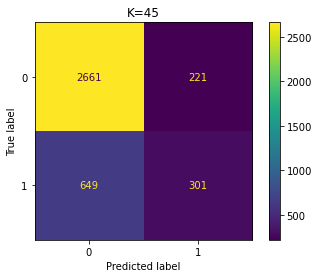

In [185]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,ConfusionMatrixDisplay
plot_confusion_matrix(clf, x_test, y_test)
plt.title("K=45")
plt.show()

In [186]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[2661,  221],
       [ 649,  301]], dtype=int64)

<AxesSubplot:>

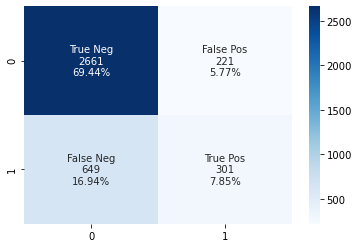

In [187]:

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')